# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

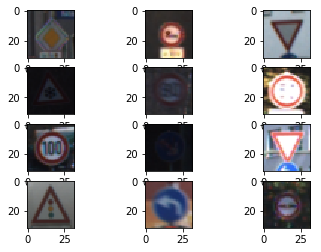

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index1 = random.randint(0, len(X_train))
index2 = random.randint(0, len(X_train))
index3 = random.randint(0, len(X_train))
index4 = random.randint(0, len(X_train))
index5 = random.randint(0, len(X_train))
index6 = random.randint(0, len(X_train))
index7 = random.randint(0, len(X_train))
index8 = random.randint(0, len(X_train))
index9 = random.randint(0, len(X_train))
index10 = random.randint(0, len(X_train))
index11 = random.randint(0, len(X_train))
index12 = random.randint(0, len(X_train))

_, axes = plt.subplots(nrows=4, ncols=3)

image1 = X_train[index1]
image2 = X_train[index2]
image3 = X_train[index3]
image4 = X_train[index4]
image5 = X_train[index5]
image6 = X_train[index6]
image7 = X_train[index7]
image8 = X_train[index8]
image9 = X_train[index9]
image10 = X_train[index10]
image11 = X_train[index11]
image12 = X_train[index12]

axes[0,0].imshow(image1)
axes[0,1].imshow(image2)
axes[0,2].imshow(image3)

axes[1,0].imshow(image4)
axes[1,1].imshow(image5)
axes[1,2].imshow(image6)

axes[2,0].imshow(image7)
axes[2,1].imshow(image8)
axes[2,2].imshow(image9)

axes[3,0].imshow(image10)
axes[3,1].imshow(image11)
axes[3,2].imshow(image12)
imgplt = plt.show()

In [4]:
path= 'examples_training/'
plt.imsave(path+'sign1',image1)
plt.imsave(path+'sign2',image2)
plt.imsave(path+'sign3',image3)
plt.imsave(path+'sign4',image4)
plt.imsave(path+'sign5',image5)
plt.imsave(path+'sign6',image6)
plt.imsave(path+'sign7',image7)
plt.imsave(path+'sign8',image8)
plt.imsave(path+'sign9',image9)
plt.imsave(path+'sign10',image10)
plt.imsave(path+'sign11',image11)
plt.imsave(path+'sign12',image12)

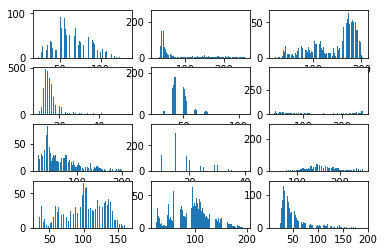

In [5]:
_, axes = plt.subplots(nrows=4, ncols=3)

axes[0,0].hist(image1.ravel(), bins=256,label='sign1')
axes[0,1].hist(image2.ravel(), bins=256)
axes[0,2].hist(image3.ravel(), bins=256)

axes[1,0].hist(image4.ravel(), bins=256)
axes[1,1].hist(image5.ravel(), bins=256)
axes[1,2].hist(image6.ravel(), bins=256)

axes[2,0].hist(image7.ravel(), bins=256)
axes[2,1].hist(image8.ravel(), bins=256)
axes[2,2].hist(image9.ravel(), bins=256)

axes[3,0].hist(image10.ravel(), bins=256)
axes[3,1].hist(image11.ravel(), bins=256)
axes[3,2].hist(image12.ravel(), bins=256)

plt.savefig(path+'signs_hist')
my_hist = plt.show()

In [6]:
x_vals, y_vals = np.unique(y_train, return_counts=True)

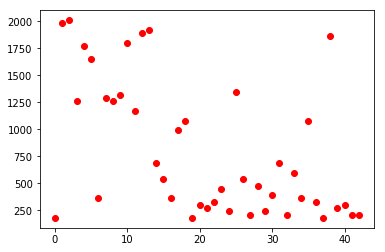

In [7]:
plt.plot(x_vals,y_vals, 'ro')
plt.savefig(path+'categories_dots')
plt.show()

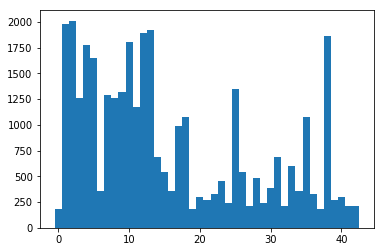

In [8]:
width = 1
bar1 = plt.bar(x_vals, y_vals, width)
plt.savefig(path+'categories_bars')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [10]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8),
 array([ 180, 1980, 2010, 1260, 1770, 1650,  360, 1290, 1260, 1320, 1800,
        1170, 1890, 1920,  690,  540,  360,  990, 1080,  180,  300,  270,
         330,  450,  240, 1350,  540,  210,  480,  240,  390,  690,  210,
         599,  360, 1080,  330,  180, 1860,  270,  300,  210,  210]))

In [11]:
# Get more data for the underrepresented categories

from PIL import Image
import os

array_length = 20000
X_train_ext = np.zeros((array_length,32,32,3),dtype='float32')
y_train_ext = np.empty(array_length,dtype='uint8')

def get_images(directory, classification, starting_i):
    
    sample_count = starting_i
    for filename in os.listdir(directory):

        if filename.endswith('ppm'):
            img = Image.open(directory+'/'+filename)
            pic = img.resize((32,32))
            pix = np.array(pic)
    
            X_train_ext[sample_count] = pix
            y_train_ext[sample_count] = classification
            sample_count += 1
    
    return sample_count

path = 'actual_data/GTSRB/Final_Training/Images/000'
short_classes=['00','06','14','15','16','19','20','21','22','23','24', \
               '26','27','28','29','30','31','32','33','34','36','37', \
               '39','40','41','42']

start_count = 0

for entry in short_classes:    
    directory = path+entry
    category = int(entry)
    start_count = get_images(directory, category, start_count)
    
X_train_ext = np.delete(X_train_ext,slice(start_count,array_length),axis=0)
y_train_ext = np.delete(y_train_ext,slice(start_count,array_length),axis=0)

In [12]:
X_train = np.concatenate((X_train,X_train_ext),axis=0)
y_train = np.concatenate((y_train,y_train_ext),axis=0)

# Adjust number of training examples
n_train = len(X_train)

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

Augment data; with more focus on underrepresented categories

In [14]:
indeces, counts = np.unique(y_train, return_counts=True)
short_categories = []
for i in range(len(indeces)):
    if counts[i] < 800:
        short_categories.append(indeces[i])

In [15]:
short_categories

[0, 6, 16, 19, 20, 21, 22, 24, 27, 29, 32, 34, 36, 37, 39, 40, 41, 42]

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

***********************************************************************************************
* The following functions are copied from the web https://github.com/vxy10/ImageAugmentation  *
***********************************************************************************************

In [17]:
# ------------------------------------ #
# this function is copied from the web #
# -------------------------------------#

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [18]:
# ------------------------------------ #
# This function is copied from the web #
# ------------------------------------ #

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

In [19]:
aug_array_length = 70000

X_train_aug = np.zeros((aug_array_length,32,32,3),dtype='float32')
y_train_aug = np.empty(aug_array_length,dtype='uint8')

aug_counter = 0

for i in range(len(X_train)):
    img = X_train[i]
    if y_train[i] in short_categories:
        # add_two
        X_train_aug[aug_counter] = transform_image(img,20,10,5)
        y_train_aug[aug_counter] = y_train[i]
        aug_counter += 1
        X_train_aug[aug_counter] = transform_image(img,20,10,5)
        y_train_aug[aug_counter] = y_train[i]
        aug_counter += 1
    else:
        # add_one
        X_train_aug[aug_counter] = transform_image(img,20,10,5)
        y_train_aug[aug_counter] = y_train[i]
        aug_counter += 1
        
        
X_train_aug = np.delete(X_train_aug,slice(aug_counter,aug_array_length),axis=0)
y_train_aug = np.delete(y_train_aug,slice(aug_counter,aug_array_length),axis=0)

In [20]:
X_train = np.concatenate((X_train,X_train_aug),axis=0)
y_train = np.concatenate((y_train,y_train_aug),axis=0)

# Adjust number of training examples
n_train = len(X_train)

In [21]:
import cv2

flag = cv2.COLOR_RGB2GRAY
X_train_gray = [cv2.cvtColor(x,flag) for x in X_train]

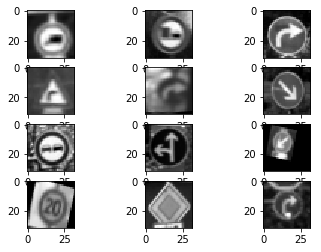

In [22]:
##Check what images look after graying out

index1 = random.randint(0, len(X_train_gray))
index2 = random.randint(0, len(X_train_gray))
index3 = random.randint(0, len(X_train_gray))
index4 = random.randint(0, len(X_train_gray))
index5 = random.randint(0, len(X_train_gray))
index6 = random.randint(0, len(X_train_gray))
index7 = random.randint(0, len(X_train_gray))
index8 = random.randint(0, len(X_train_gray))
index9 = random.randint(0, len(X_train_gray))
index10 = random.randint(0, len(X_train_gray))
index11 = random.randint(0, len(X_train_gray))
index12 = random.randint(0, len(X_train_gray))

_, axes = plt.subplots(nrows=4, ncols=3)

image1_g = X_train_gray[index1]
image2_g = X_train_gray[index2]
image3_g = X_train_gray[index3]
image4_g = X_train_gray[index4]
image5_g = X_train_gray[index5]
image6_g = X_train_gray[index6]
image7_g = X_train_gray[index7]
image8_g = X_train_gray[index8]
image9_g = X_train_gray[index9]
image10_g = X_train_gray[index10]
image11_g = X_train_gray[index11]
image12_g = X_train_gray[index12]

axes[0,0].imshow(image1_g, cmap='gray')
axes[0,1].imshow(image2_g, cmap='gray')
axes[0,2].imshow(image3_g, cmap='gray')

axes[1,0].imshow(image4_g, cmap='gray')
axes[1,1].imshow(image5_g, cmap='gray')
axes[1,2].imshow(image6_g, cmap='gray')

axes[2,0].imshow(image7_g, cmap='gray')
axes[2,1].imshow(image8_g, cmap='gray')
axes[2,2].imshow(image9_g, cmap='gray')

axes[3,0].imshow(image10_g, cmap='gray')
axes[3,1].imshow(image11_g, cmap='gray')
axes[3,2].imshow(image12_g, cmap='gray')


In [23]:
path= 'examples_training_gray/'
plt.imsave(path+'sign1_g',image1_g)
plt.imsave(path+'sign2_g',image2_g)
plt.imsave(path+'sign3_g',image3_g)
plt.imsave(path+'sign4_g',image4_g)
plt.imsave(path+'sign5_g',image5_g)
plt.imsave(path+'sign6_g',image6_g)
plt.imsave(path+'sign7_g',image7_g)
plt.imsave(path+'sign8_g',image8_g)
plt.imsave(path+'sign9_g',image9_g)
plt.imsave(path+'sign10_g',image10_g)
plt.imsave(path+'sign11_g',image11_g)
plt.imsave(path+'sign12_g',image12_g)

In [24]:
# reshape so LeNet can process
X_train = [x.reshape(32,32,1) for x in X_train_gray]

In [25]:
   # Normalize
    
    b = 0.9
    a = 0.1
    xmin = 0
    xmax = 255
    
    X_train = [a + (x - xmin) * (b - a) / (xmax - xmin) for x in X_train]


In [26]:
X_valid = [cv2.cvtColor(x,flag).reshape(32,32,1) for x in X_valid]
X_valid = [a + (x - xmin) * (b - a) / (xmax - xmin) for x in X_valid]

In [27]:
EPOCHS = 100
BATCH_SIZE = 128

### Model Architecture

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [29]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

In [30]:
# Original LeNet
# --------------

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [31]:
# Scenario 1: feeds 1st conv layer input to classification process
# ----------------------------------------------------------------

def LeNet_1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Flatten. Input = 28x28x6. Output = 4704.
    fc0   = flatten(conv1)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 800.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4704, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [32]:
# =============
# Final Model =
# =============

# Scenario 2: Removes 1st pooling layer
# -------------------------------------

def LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. input 28x28x6 Output = 24x24x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 24x24x16 output = 12x12x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # input 12x12x16 Output = 10x10x12
    conv25_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 12), mean = mu, stddev = sigma))
    conv25_b = tf.Variable(tf.zeros(12))
    conv25   = tf.nn.conv2d(conv2, conv25_W, strides=[1, 1, 1, 1], padding='VALID') + conv25_b
  
    # Activation.
    conv25 = tf.nn.relu(conv25)

    # SOLUTION: Flatten. Input = 10x10x12. Output = 1200
    fc0   = flatten(conv25)
    
    # SOLUTION: Layer 3: Fully Connected. Input 1200 , output 200
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [33]:
# Scenario 3; Original + Direct feed from input to output
# -------------------------------------------------------

def LeNet_3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1st   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1st)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: 1st layer Output = Input = 28x28x6. Output = 4704
    fc_dir = flatten(conv1st)
    fcdir_W = tf.Variable(tf.truncated_normal(shape=(4704, n_classes), mean = mu, stddev = sigma))
    fcdir_b = tf.Variable(tf.zeros(n_classes))

    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b + tf.nn.xw_plus_b(fc_dir, fcdir_W, fcdir_b)
    
    return logits

In [34]:
# Scenario 4: adds a drop out at the beginning of the network
# -----------------------------------------------------------

def LeNet_4(x):
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Solution: dropout
    fc1 = tf.nn.dropout(fc1, 0.5)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

__Features and Labels__

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [35]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.uint8, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [36]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

__Training Pipeline__

Create a training pipeline that uses the model to classify MNIST data.

In [37]:
rate = 0.001

In [38]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [39]:
logits_1 = LeNet_1(x)
cross_entropy_1 = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits_1)
loss_operation_1 = tf.reduce_mean(cross_entropy_1)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation_1 = optimizer.minimize(loss_operation_1)

In [40]:
# =============
# Final Model =
# =============

logits_2 = LeNet_2(x)
cross_entropy_2 = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits_2)
loss_operation_2 = tf.reduce_mean(cross_entropy_2)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation_2 = optimizer.minimize(loss_operation_2)

In [41]:
logits_3 = LeNet_3(x)
cross_entropy_3 = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits_3)
loss_operation_3 = tf.reduce_mean(cross_entropy_3)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation_3 = optimizer.minimize(loss_operation_3)

In [42]:
logits_4 = LeNet_4(x)
cross_entropy_4 = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits_4)
loss_operation_4 = tf.reduce_mean(cross_entropy_4)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation_4 = optimizer.minimize(loss_operation_4)

__Model Evaluation__

Evaluate how well the loss and accuracy of the model for a given dataset.

In [43]:
# Original Scenario
# -----------------

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [44]:
# Scenario 1: feed 1st convlution layer output to classification
# --------------------------------------------------------------

correct_prediction_1 = tf.equal(tf.argmax(logits_1, 1), tf.argmax(one_hot_y, 1))
accuracy_operation_1 = tf.reduce_mean(tf.cast(correct_prediction_1, tf.float32))
saver = tf.train.Saver()

def evaluate_1(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation_1, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [45]:
# =============
# Final Model =
# =============

# Sceanrio 2: Remove one pooling layer
# ------------------------------------
correct_prediction_2 = tf.equal(tf.argmax(logits_2, 1), tf.argmax(one_hot_y, 1))
accuracy_operation_2 = tf.reduce_mean(tf.cast(correct_prediction_2, tf.float32))
saver = tf.train.Saver()

def evaluate_2(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation_2, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [46]:
# Sceanrio 3: Original Scenario + feed from 1st layer to classifier
# -----------------------------------------------------------------
correct_prediction_3 = tf.equal(tf.argmax(logits_3, 1), tf.argmax(one_hot_y, 1))
accuracy_operation_3 = tf.reduce_mean(tf.cast(correct_prediction_3, tf.float32))
saver = tf.train.Saver()

def evaluate_3(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation_3, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [47]:
# Scenario 4: Add a drop out layer
# --------------------------------
correct_prediction_4 = tf.equal(tf.argmax(logits_4, 1), tf.argmax(one_hot_y, 1))
accuracy_operation_4 = tf.reduce_mean(tf.cast(correct_prediction_4, tf.float32))
saver = tf.train.Saver()

def evaluate_4(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation_4, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

__Train the model__

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [57]:
# Original training
# -----------------

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.724

EPOCH 2 ...
Validation Accuracy = 0.824

EPOCH 3 ...
Validation Accuracy = 0.889

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.925

EPOCH 9 ...
Validation Accuracy = 0.937

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.936

EPOCH 12 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.936

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.946

EPOCH 16 ...
Validation Accuracy = 0.946

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.954

EPOCH 20 ...
Validation Accuracy = 0.957

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.956

EPOCH 23 ...
Validation Accuracy = 0.948

EPOCH 24 ...
Validation Accura

In [54]:
# Scenario 1: Feeding 1st conv layer directly to classification
# -------------------------------------------------------------

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation_1, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate_1(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.803

EPOCH 2 ...
Validation Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.919

EPOCH 4 ...
Validation Accuracy = 0.932

EPOCH 5 ...
Validation Accuracy = 0.936

EPOCH 6 ...
Validation Accuracy = 0.935

EPOCH 7 ...
Validation Accuracy = 0.943

EPOCH 8 ...
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.938

EPOCH 12 ...
Validation Accuracy = 0.937

EPOCH 13 ...
Validation Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.945

EPOCH 15 ...
Validation Accuracy = 0.943

EPOCH 16 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.944

EPOCH 19 ...
Validation Accuracy = 0.950

EPOCH 20 ...
Validation Accuracy = 0.949

EPOCH 21 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.947

EPOCH 24 ...
Validation Accura

In [52]:
# =============
# Final Model =
# =============

# Scenario 2; removing one pooling layer
# --------------------------------------

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation_2, feed_dict={x: batch_x, y: batch_y})
#            sess.run(training_operation_1, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate_2(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_2')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.907

EPOCH 2 ...
Validation Accuracy = 0.929

EPOCH 3 ...
Validation Accuracy = 0.957

EPOCH 4 ...
Validation Accuracy = 0.964

EPOCH 5 ...
Validation Accuracy = 0.966

EPOCH 6 ...
Validation Accuracy = 0.968

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.971

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.979

EPOCH 11 ...
Validation Accuracy = 0.969

EPOCH 12 ...
Validation Accuracy = 0.970

EPOCH 13 ...
Validation Accuracy = 0.972

EPOCH 14 ...
Validation Accuracy = 0.971

EPOCH 15 ...
Validation Accuracy = 0.971

EPOCH 16 ...
Validation Accuracy = 0.969

EPOCH 17 ...
Validation Accuracy = 0.967

EPOCH 18 ...
Validation Accuracy = 0.981

EPOCH 19 ...
Validation Accuracy = 0.975

EPOCH 20 ...
Validation Accuracy = 0.973

EPOCH 21 ...
Validation Accuracy = 0.983

EPOCH 22 ...
Validation Accuracy = 0.972

EPOCH 23 ...
Validation Accuracy = 0.976

EPOCH 24 ...
Validation Accura

In [50]:
# Scenario 3; Original Scenario + feed from 1st layer
# --------------------------------------------------

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation_3, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate_3(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_3')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.802

EPOCH 2 ...
Validation Accuracy = 0.863

EPOCH 3 ...
Validation Accuracy = 0.900

EPOCH 4 ...
Validation Accuracy = 0.928

EPOCH 5 ...
Validation Accuracy = 0.919

EPOCH 6 ...
Validation Accuracy = 0.937

EPOCH 7 ...
Validation Accuracy = 0.944

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.941

EPOCH 17 ...
Validation Accuracy = 0.943

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.950

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.950

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

In [70]:
# Scenario 4; adding one drop out layer
# --------------------------------------

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation_4, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate_4(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_4')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.596

EPOCH 2 ...
Validation Accuracy = 0.725

EPOCH 3 ...
Validation Accuracy = 0.777

EPOCH 4 ...
Validation Accuracy = 0.807

EPOCH 5 ...
Validation Accuracy = 0.836

EPOCH 6 ...
Validation Accuracy = 0.852

EPOCH 7 ...
Validation Accuracy = 0.857

EPOCH 8 ...
Validation Accuracy = 0.874

EPOCH 9 ...
Validation Accuracy = 0.875

EPOCH 10 ...
Validation Accuracy = 0.878

EPOCH 11 ...
Validation Accuracy = 0.890

EPOCH 12 ...
Validation Accuracy = 0.889

EPOCH 13 ...
Validation Accuracy = 0.887

EPOCH 14 ...
Validation Accuracy = 0.896

EPOCH 15 ...
Validation Accuracy = 0.888

EPOCH 16 ...
Validation Accuracy = 0.900

EPOCH 17 ...
Validation Accuracy = 0.898

EPOCH 18 ...
Validation Accuracy = 0.902

EPOCH 19 ...
Validation Accuracy = 0.917

EPOCH 20 ...
Validation Accuracy = 0.898

EPOCH 21 ...
Validation Accuracy = 0.909

EPOCH 22 ...
Validation Accuracy = 0.909

EPOCH 23 ...
Validation Accuracy = 0.905

EPOCH 24 ...
Validation Accura

Test the model

In [48]:
from sklearn.utils import shuffle

X_test, y_test = shuffle(X_test, y_test)

In [49]:
import cv2

flag = cv2.COLOR_RGB2GRAY
X_test = [cv2.cvtColor(x,flag).reshape(32,32,1) for x in X_test]
X_test = [a + (x - xmin) * (b - a) / (xmax - xmin) for x in X_test]

In [50]:
#import tensorflow as tf 
#tf.reset_default_graph()
#saver = tf.train.Saver()

In [71]:
# Original Scenario - Training Accuracy
# -------------------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic')

    train_accuracy = evaluate(X_train, y_train)

print('Training Accuracy: {}'.format(train_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic
Training Accuracy: 0.9107737764781157


In [50]:
# Original Scenario - Testing Accuracy
# ------------------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic')

    test_accuracy = evaluate(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic
Test Accuracy: 0.9083135392962235


In [52]:
# Scenario 1 - Testing accuracy
# -----------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic_1')

    test_accuracy_1 = evaluate_1(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy_1))

INFO:tensorflow:Restoring parameters from ./traffic_1
Test Accuracy: 0.8804433886342263


In [72]:
# =============
# Final Model =
# =============

# Scenario 2 - Training accuracy
# ------------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic_2')

    train_accuracy_2 = evaluate_2(X_train, y_train)

print('Training Accuracy: {}'.format(train_accuracy_2))

INFO:tensorflow:Restoring parameters from ./traffic_2
Training Accuracy: 0.9940112636120907


In [53]:
# =============
# Final Model =
# =============

# Sceanrio 2 - Testing accuracy
# -----------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic_2')

    test_accuracy_2 = evaluate_2(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy_2))

INFO:tensorflow:Restoring parameters from ./traffic_2
Test Accuracy: 0.9387965164105286


In [75]:
# Scenario 3 - Testing accuracy
# -----------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic_3')

    test_accuracy_3 = evaluate_3(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy_3))

INFO:tensorflow:Restoring parameters from ./traffic_3
Test Accuracy: 0.9165479019248853


In [74]:
# Scenario 4 - Testing accuracy
# -----------------------------

with tf.Session() as sess:
    saver.restore(sess, './traffic_4')

    test_accuracy_4 = evaluate_4(X_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy_4))

INFO:tensorflow:Restoring parameters from ./traffic_4
Test Accuracy: 0.8897862234572428


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [76]:
import csv
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv

In [93]:
# Load the external images
# ------------------------

from PIL import Image
import os


ext_directory = 'External_photos/'

array_length = 50
file_names = []          # for later saving the gray images
directory_names = []
X_test_ext = np.zeros((array_length,32,32,3),dtype='float32')
y_test_ext = np.empty(array_length,dtype='uint8')


categories_directories = os.listdir(ext_directory)
i = 0
for category_directory in categories_directories:
    images = os.listdir(ext_directory+category_directory)
    for img in images:
        raw_image = Image.open(ext_directory+category_directory+'/'+img)
        pix = np.array(raw_image)
        pic = cv.resize(pix, (32,32),interpolation=cv.INTER_AREA)
        X_test_ext[i] = pic
        y_test_ext[i] = int(category_directory)
        file_names.append(img)
        i += 1
        
X_test_ext = np.delete(X_test_ext,slice(i,array_length),axis=0)
y_test_ext = np.delete(y_test_ext,slice(i,array_length),axis=0)

In [94]:
y_path = 'signnames.csv'

y_categories = []

with open(y_path, newline='') as csvfile:
    testreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    counter = -1
    for row in testreader:
        if counter >= 0:                 # Drop the headings column
            class_id = int(row[0])
            y_categories.append(row[1])
        counter += 1

In [95]:
    b = 0.9
    a = 0.1
    xmin = 0
    xmax = 255

In [96]:
import cv2

X_ext_directory_g = 'External_photos_gray'

flag = cv2.COLOR_RGB2GRAY
X_test_ext_gray = [cv2.cvtColor(x,flag) for x in X_test_ext]

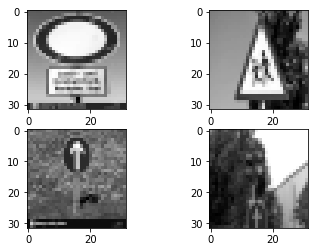

In [97]:
_, axes = plt.subplots(nrows=2, ncols=2)

image0_g = X_test_ext_gray[0]
image1_g = X_test_ext_gray[1]
image2_g = X_test_ext_gray[2]
image3_g = X_test_ext_gray[3]

axes[0,0].imshow(image0_g, cmap='gray')
axes[0,1].imshow(image1_g, cmap='gray')
axes[1,0].imshow(image2_g, cmap='gray')
axes[1,1].imshow(image3_g, cmap='gray')

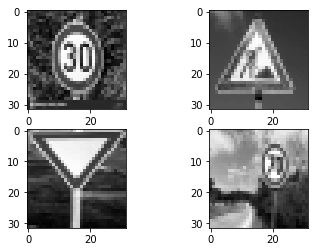

In [98]:
_, axes = plt.subplots(nrows=2, ncols=2)

image4_g = X_test_ext_gray[4]
image5_g = X_test_ext_gray[5]
image6_g = X_test_ext_gray[6]
image7_g = X_test_ext_gray[7]

axes[0,0].imshow(image4_g, cmap='gray')
axes[0,1].imshow(image5_g, cmap='gray')
axes[1,0].imshow(image6_g, cmap='gray')
axes[1,1].imshow(image7_g, cmap='gray')


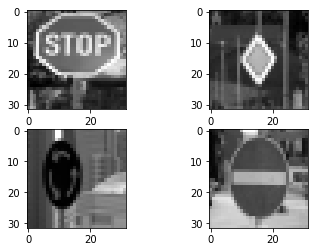

In [99]:
_, axes = plt.subplots(nrows=2, ncols=2)

image8_g = X_test_ext_gray[8]
image9_g = X_test_ext_gray[9]
image10_g = X_test_ext_gray[10]
image11_g = X_test_ext_gray[11]

axes[0,0].imshow(image8_g, cmap='gray')
axes[0,1].imshow(image9_g, cmap='gray')
axes[1,0].imshow(image10_g, cmap='gray')
axes[1,1].imshow(image11_g, cmap='gray')


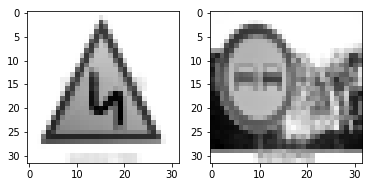

In [100]:
_, axes = plt.subplots(nrows=1, ncols=2)

image12_g = X_test_ext_gray[12]
image13_g = X_test_ext_gray[13]

axes[0].imshow(image12_g, cmap='gray')
axes[1].imshow(image13_g, cmap='gray')


In [102]:
for i in range(len(X_test_ext_gray)):
    if y_test_ext[i] < 10:
        directory_name = '0'+str(y_test_ext[i])
    else:
        directory_name = str(y_test_ext[i])
        
    target_f_name = X_ext_directory_g+'/'+directory_name+'/'+file_names[i]
    plt.imsave(target_f_name,X_test_ext_gray[i])
    
    
X_test_ext = [a + (x - xmin) * (b - a) / (xmax - xmin) for x in X_test_ext_gray]

    
X_test_ext = [x.reshape(32,32,1) for x in X_test_ext]

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [60]:
#import tensorflow as tf 

#saver = tf.train.Saver()

In [67]:
# original model
# --------------

y_softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './traffic')    
    n_array = sess.run(y_softmax, feed_dict={x: X_test_ext})

INFO:tensorflow:Restoring parameters from ./traffic


In [68]:
with tf.Session() as sess:
    final = sess.run(tf.nn.top_k(tf.constant(n_array), k=3))

In [69]:
success_counter = 0
for i in range(len(final[0])):
    if final[1][i][0] == y_test_ext[i]:
        success_counter += 1
        
print("Success is ", success_counter / len(X_test_ext) * 100)

Success is  35.714285714285715


In [63]:
# =============
# Final Model =
# =============

# Scenario 2 (removing a pooling layer)
# -------------------------------------

y_softmax_2 = tf.nn.softmax(logits_2)

with tf.Session() as sess:
    saver.restore(sess, './traffic_2')    
    n_array_2 = sess.run(y_softmax_2, feed_dict={x: X_test_ext})

INFO:tensorflow:Restoring parameters from ./traffic_2


In [64]:
with tf.Session() as sess:
    final_2 = sess.run(tf.nn.top_k(tf.constant(n_array_2), k=3))

In [65]:
success_counter = 0
for i in range(len(final_2[0])):
    if final_2[1][i][0] == y_test_ext[i]:
        success_counter += 1
        
print("Success is ", success_counter / len(X_test_ext) * 100)

Success is  57.14285714285714


In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Loading random photos from the web

In [64]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

To get a better feeling of the top categories, we normalize first

In [72]:
# Original model
# --------------
for i in range(len(final[1])):
    print('-------------------------')
    print('image file is ', file_names[i])
    print('=========================')
    for j in range(len(final[0][i])):
            print(' probability = ', final[0][i][j], '     ', final[1][i][j], 'correct is ', y_test_ext[i])

-------------------------
image file is  novehicles.jpeg
 probability =  0.904297       41 correct is  15
 probability =  0.0773085       13 correct is  15
 probability =  0.0156889       12 correct is  15
-------------------------
image file is  childrencrossing.jpeg
 probability =  1.0       28 correct is  28
 probability =  2.41313e-09       30 correct is  28
 probability =  1.89153e-13       29 correct is  28
-------------------------
image file is  aheadonly.jpeg
 probability =  0.972975       22 correct is  35
 probability =  0.0232504       29 correct is  35
 probability =  0.00349171       21 correct is  35
-------------------------
image file is  trafficsignals.jpeg
 probability =  0.637476       25 correct is  26
 probability =  0.362524       20 correct is  26
 probability =  2.91683e-08       30 correct is  26
-------------------------
image file is  speedlimit30.jpeg
 probability =  0.694378       1 correct is  1
 probability =  0.305622       2 correct is  1
 probability 

In [66]:
# =============
# Final Model =
# =============

# Scenario_2 - removing one pooling layer
# ---------------------------------------
for i in range(len(final_2[1])):
    print('-------------------------')
    print('image file is ', file_names[i])
    print('=========================')
    for j in range(len(final_2[0][i])):
            print(' probability = ', final_2[0][i][j], '     ', final_2[1][i][j], 'correct is ', y_test_ext[i])

-------------------------
image file is  novehicles.jpeg
 probability =  1.0       15 correct is  15
 probability =  7.58797e-10       13 correct is  15
 probability =  2.70681e-18       12 correct is  15
-------------------------
image file is  childrencrossing.jpeg
 probability =  0.999999       28 correct is  28
 probability =  1.39424e-06       11 correct is  28
 probability =  1.25653e-14       30 correct is  28
-------------------------
image file is  aheadonly.jpeg
 probability =  0.850978       39 correct is  35
 probability =  0.119767       40 correct is  35
 probability =  0.0291657       25 correct is  35
-------------------------
image file is  trafficsignals.jpeg
 probability =  0.909163       21 correct is  26
 probability =  0.0341308       20 correct is  26
 probability =  0.0325437       1 correct is  26
-------------------------
image file is  speedlimit30.jpeg
 probability =  1.0       1 correct is  1
 probability =  9.37331e-14       2 correct is  1
 probability = 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")